# Hypothesis testing
A statistical hypothesis test is a method of statistical inference used to decide whether the data sufficiently support a particular hypothesis.
Statistical hypothesis tests are based on statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing, and a alternate hypothesis thatt states that there is a statistical significance 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from random import sample 

# T test
### Single sample T test
Use a one sample t test to evaluate a population mean using a single sample. Usually, you conduct this hypothesis test to determine whether a population mean differs from a hypothesized value you specify.
EX: A phone company claims that the new battery technology would last 24 hours if fully charged.
A single t test would be able to test this claim. 

In the below code, we create a population that has a noraml distribution with a mean of 24 and std of 1, note that this is the ground truth and in a realistic situation, the mean and std of the population are unkown.
The code then random samples from the population to retrieve a sample set that we will apply single sample T test on.
- H0 (null hypothesis): The population mean equals the hypothesized value(24 hours battery life) 
- H1 (Alternative hypothesis): The population mean does not equal the hypothesized value.

The threshold to test for statistcal sitgnificants would be set to 0.05 or 5%, this is a common threshold. 

The sample mean is 24.00 hours, and the sample std is 1.00


Text(0.5, 1.0, 'Sample')

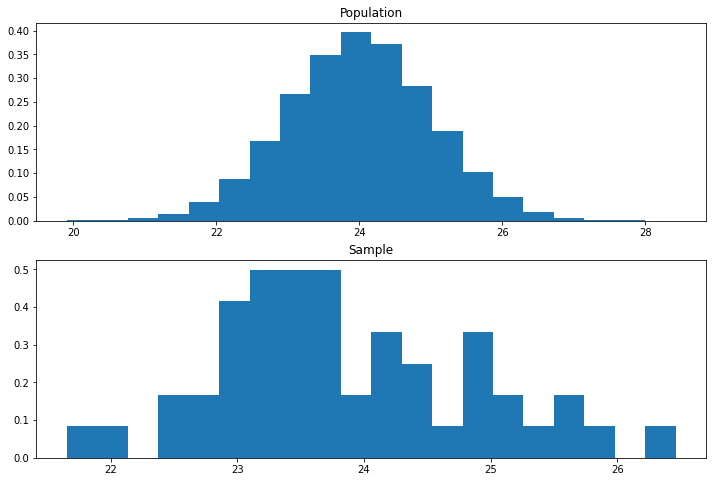

In [9]:
population= stats.norm.rvs(loc=24, scale=1, size=150000)
sample = np.random.choice(population,size = 50)

# print(f'The population mean is {population.mean():.2f}, and the population std is {population.std():.2f}')
print(f'The sample mean is {population.mean():.2f} hours, and the sample std is {population.std():.2f}')

fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (12,8))
ax[0].hist(population, density=True, bins=20)
ax[0].set_title('Population')
ax[1].hist(sample, density=True, bins=20)
ax[1].set_title('Sample')

In [10]:
t_stat, p_value = stats.ttest_1samp(sample, popmean=24)
print(f'The p value for this T test is {p_value:.4f}')

The p value for this T test is 0.3538


Since the p value is larger than 0.05, we fail to reject the null hypothesis. Therefore, we conclude that the claim of the company is correct.
In this example, since we know the population mean is indeed 24 hours, the test is prove to give us the correct inference.

However, if we create a population with a mean of 23 hours and a std of 1. The t test gives us a p value less than the threshold 0.05, in that case, we will reject the null hypothesis and conclude that the battery life is not 24 hours. Note: we can only conlcude that the battery life is not 24 hours, but we can not imply that it is larger or lower than 24 hours.

The p value for this T test is 9.166280643946068e-11


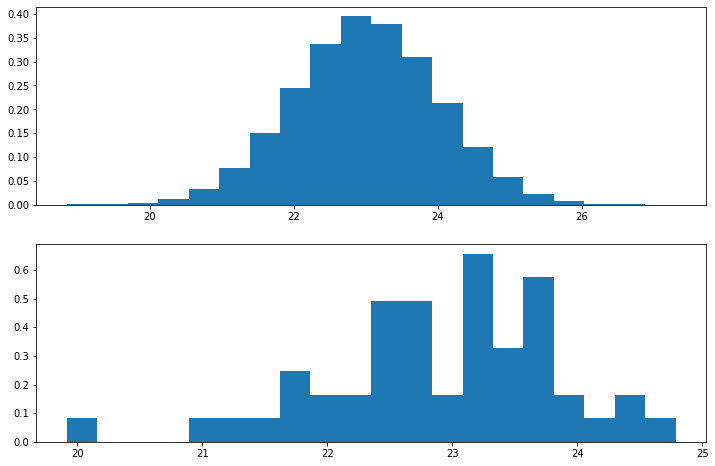

In [12]:
population2 = stats.norm.rvs(loc=23, scale=1, size=150000)
sample2 = np.random.choice(population2,size = 50)
fig,ax = plt.subplots(nrows = 2, ncols = 1,figsize = (12,8))
ax[0].hist(population2, density=True, bins=20)
ax[1].hist(sample2, density=True, bins=20)

t_stat, p_value = stats.ttest_1samp(sample2, popmean=24)
print(f'The p value for this T test is {p_value}')

### Two sample T test (two tail)
A two sample t test is used to test whether the unkown population means of two groups are equak or not.
In the following example we will compare two delivery companies and use the two sample t test to test the delivery time. Company A has an average delivery time of 48 hours and std of 2. Company B has an average delivery time of 45 hours and std of 2. This underlying ground truth is unknown in real life. The two samples are random samples with a size of 50.

Text(0.5, 1.0, 'B company delivery sample')

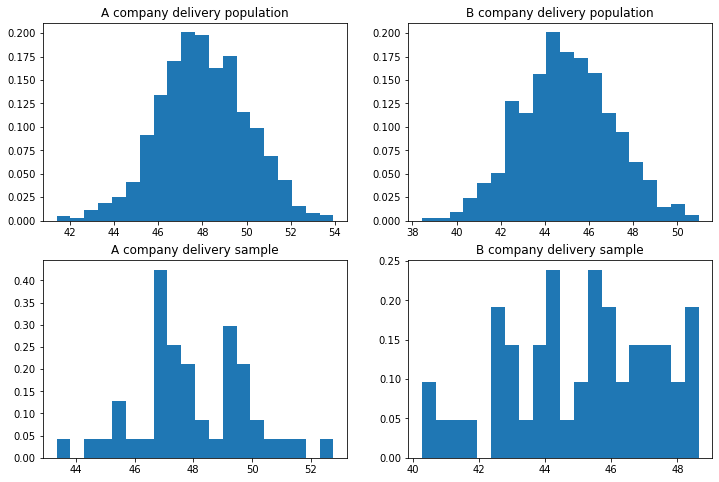

In [7]:
# define the population ground truth 
A_delivery = stats.norm.rvs(loc=48, scale=2, size=1000)
B_delivery = stats.norm.rvs(loc=45, scale=2, size=1000)
# random sample
A_sample = np.random.choice(A_delivery,size = 50)
B_sample = np.random.choice(B_delivery,size = 50)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

ax[0,0].hist(A_delivery, density=True, bins=20)
ax[0,0].set_title('A company delivery population')
ax[0,1].hist(B_delivery, density=True, bins=20)
ax[0,1].set_title('B company delivery population')
ax[1,0].hist(A_sample, density=True, bins=20)
ax[1,0].set_title('A company delivery sample')
ax[1,1].hist(B_sample, density=True, bins=20)
ax[1,1].set_title('B company delivery sample')

- H0 (null hypothesis): The delivery time of company A and B are the same.
- H1(Alternative hypothesis): The delivery time of comapy A and B are different.

The threshold will be set to 0.05. If the p value is smaller than the threshold we can reject the null hypothesis.

In [8]:
t_statistic, p_value = stats.ttest_ind(A_sample, B_sample)
print(f'The p value for this two sample T test is {p_value:.4f}')

The p value for this two sample T test is 0.0000


Since the p value is smaller than 0.05, we reject the null hypothesis and accept the alternative hypothesis that the delivery time of these two companies have a statistical difference. Note: We can only conclude that there is a difference, but not the relationship (which company has shorter delivery time). This is why the test is called the two tailed t test. The p value is calculated by integral of both side of the likelihood plot.

### Two sample T test (one tail)
In the two tail t test, we were able to determine if two populations have the same mean or not. However, we aren't able to decide the relationship. This is when then the one sample t test is used. The one sample t test is a directional test that determines the relationship between population means in a single direction.

- H0(Null hypothesis): The population mean is the same.
- H1(Alternative hypothesis): population A has a larger mean than B.

In [16]:
t_statistic, p_value = stats.ttest_ind(A_sample, B_sample, alternative='greater')
print(f'The p value for when the alternative hypothesis is A > B is {p_value:.4f}')

The p value for when the alternative hypothesis is A > B is 0.0000


- H0(Null hypothesis): The population mean is the same.
- H1(Alternative hypothesis): population A has a smaller mean than B.

In [17]:
t_statistic, p_value = stats.ttest_ind(A_sample, B_sample, alternative='less')
print(f'The p value for when the alternative hypothesis is A < B is {p_value:.4f}')

The p value for when the alternative hypothesis is A < B is 1.0000


Keeping in mind the ground truth is that A population mean > B population mean. In our first one tail t test, we have a p value smller than the threshold, so we reject the null hypothesis and accept the alternative hypothesis that population A has a larger mean.

In the second one tail t test, we see that since the p value is greater than the trehshold we fail to reject the null hypothesis, and conclude that the population mean is the same. **From this example we can see that it is important to choose the right test for the problem.** 

### Paired t test
The paired t-test is a method used to test whether the mean difference between pairs of measurements is zero or not. It is a statistical concept and is used to check whether the mean difference between the two sets of observation is equal to zero.  Each entity is measured is two times in this test that results in the pairs of observations.
In this example we will consider a weight loss program is effective or not. The test subject will be weighted before and after the program (the weight before and after are the "pair"). A pared t test will be conducted. 

The test subject has an average weight of 80kg and 2 std before the program, and the ground truth is that the program did work and a average of 1.25kg with a std of 1 was lost. 

Text(0.5, 1.0, 'Sample Weight after program')

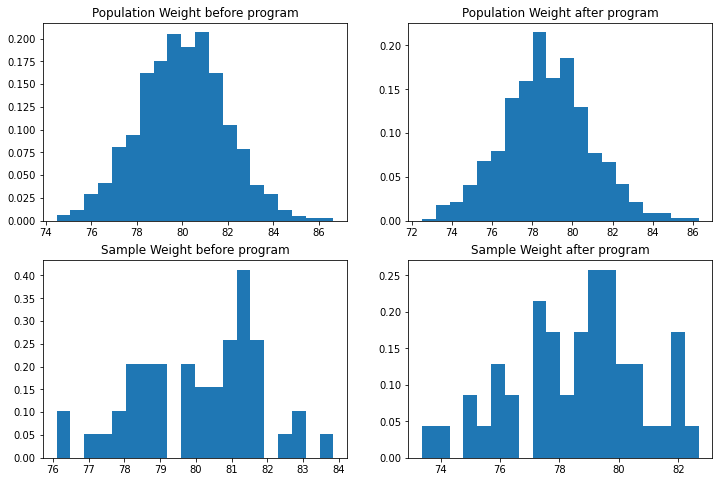

In [47]:
# define the population ground truth 
weight_before = stats.norm.rvs(loc=80, scale=2, size=1000)
weight_loss = stats.norm.rvs(loc=1.25, scale=1, size=1000)
weight_after = weight_before - weight_loss
# random sample
before_sample = np.random.choice(weight_before,size = 50)
after_sample = np.random.choice(weight_after,size = 50)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

ax[0,0].hist(weight_before, density=True, bins=20)
ax[0,0].set_title('Population Weight before program')
ax[0,1].hist(weight_after, density=True, bins=20)
ax[0,1].set_title('Population Weight after program')
ax[1,0].hist(before_sample, density=True, bins=20)
ax[1,0].set_title('Sample Weight before program')
ax[1,1].hist(after_sample, density=True, bins=20)
ax[1,1].set_title('Sample Weight after program')

- H0(Null hypothesis): The program did not work, and the mean pre-test and post-test scores are equal.
- H1(Alternative hypothesis): The mean pre-test and post-test scores are not equal.

In [48]:
t_statistic, p_value = stats.ttest_rel(before_sample, after_sample) 
print(f'The p value is {p_value:.4f}')

The p value is 0.0002


From the paried t test, we conclude that the null hypothesis is rejected and the mean weight before and after the program is different. However, we can't conclude the population has a mean weight larger or smaller than the before mean weight since what we did was a two tail test. 

To find out if the weight loss program worked in helping test subjects loss weight, it is a good idea to use The one tail paired t test.
- H0(Null hypothesis): The program did not work, and the mean pre-test and post-test scores are equal.
- H1(Alternative hypothesis): The mean pre-test is greater than the mean post-test.

In [51]:
t_statistic, p_value = stats.ttest_rel(before_sample, after_sample, alternative='greater') 
print(f'The p value is {p_value:.4f}')

The p value is 0.0001


From the one tailed paired t test, we conclude that the null hypothesis should be rejected and the mean weight before the program is greater than after the program.

# ANOVA (Analysis of Variance)
ANOVA is a test used to determine differences between research results from three or more unrelated samples or groups.

# Chi-Squared test